# Profitability of Apps

In this project, we will explore the profitability of free apps in the App Store and on Google Play.

We will use the datasets from Kaggle:
* App Store: https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps
* Google Play: https://www.kaggle.com/lava18/google-play-store-apps

## Setup

In [1]:
import pandas as pd
import numpy as np

app_store_data = pd.read_csv('AppleStore.csv')
google_play_data = pd.read_csv('googleplaystore.csv')

Lets first take a look at the App Store data

In [2]:
print('App Store Columns:')
print(app_store_data.columns)
print('\nApp Store Data:')
print(app_store_data.head(5))
print('\nApp Store Data Size:')
print(app_store_data.shape)

App Store Columns:
Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

App Store Data:
          id               track_name  size_bytes currency  price  \
0  284882215                 Facebook   389879808      USD    0.0   
1  389801252                Instagram   113954816      USD    0.0   
2  529479190           Clash of Clans   116476928      USD    0.0   
3  420009108               Temple Run    65921024      USD    0.0   
4  284035177  Pandora - Music & Radio   130242560      USD    0.0   

   rating_count_tot  rating_count_ver  user_rating  user_rating_ver      ver  \
0           2974676               212          3.5              3.5     95.0   
1           2161558              1289          4.5              4.0    10.23   
2           2130805            

The App Store dataset contains 7197 apps and 16 columns. Of the 16 columns, some interesting columns that may be useful for our analysis are: 'track_name', 'price', 'rating_count_tot', 'user_rating', and 'prime_genre'.
Let's follow a similar process for the Google Play Store data

In [3]:
print('Google Play Columns:')
print(google_play_data.columns)
print('\nGoogle Play Data:')
print(google_play_data.head(5))
print('\nGoogle Play Data size:')
print(google_play_data.shape)

Google Play Columns:
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Google Play Data:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0        

The Google Play dataset contains 10841 apps and 13 columns. Some interesting columns are: 'App', 'Category', 'Rating', 'Reviews', 'Type', and 'Genres

## Data Cleaning

### Missing Values

Let's first take a look for any missing data

In [4]:
app_store_data.isnull().sum()

id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

For the App Store data, there are no missing values.

In [5]:
google_play_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

We see that the Google Play data has a decent amount on missing data in the 'Rating' column, which is possibly due to having no/not enough users rate the app. There are also a few missing values in 'Current Ver' and 'Android Ver', but these columns will not affect our analysis. Lastly, there is one missing value in 'Type' and 'Content Rating', which we will need to look into.

Let's explore the missing value in 'Type'. 'Type' is a categorical variable that indicates whether is app is free or paid, let's check the unique values in 'Type' to make sure.

In [6]:
print(google_play_data['Type'].unique())

['Free' 'Paid' nan '0']


We see that the 'Type' column is in fact an indicator for free versus paid apps, so it does not make much sense for there to be a null value since it should be reflective of the value in the 'Price' column.

In [7]:
google_play_data[google_play_data['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


We see that the app 'Command & Conquer: Rivals' in index 9148 has price of 0, so we will change its type to free.

In [8]:
google_play_data.loc[9148, 'Type'] = 'Free'
print(google_play_data.loc[9148])

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  NaN
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                   Free
Price                                     0
Content Rating                 Everyone 10+
Genres                             Strategy
Last Updated                  June 28, 2018
Current Ver              Varies with device
Android Ver              Varies with device
Name: 9148, dtype: object


Note that when we looked at the unique values in 'Type' we also saw a value of 0, it is possible that it was a typo to indicate the app is free. Let's take a look.

In [9]:
google_play_data[google_play_data['Type'] == '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


The row in index 10472 seems to have mismatched data due to the missing app name which caused the inaccuracy in 'Type' and is also the missing value in 'Content Rating'. In this case, we will remove this row.

In [10]:
google_play_data = google_play_data.drop(index=10472)
google_play_data[google_play_data['Type'] == '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Finally let's observe the missing data in 'Rating'

In [11]:
google_play_data[google_play_data['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Our initial assumption was that there was no ratings to apps because there were no reviews. However, it is still possible that these apps do not have enough reviews for a rating. Before we compare the number of reviews between apps with ratings and apps without ratings, we should make sure the data does not have duplicate rows.

### Duplicate Values

In [12]:
app_store_data.loc[app_store_data.duplicated(), :]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic


The App Store data does not have any duplicate rows. However, it may be a good idea to double check if any apps appear twice in the dataset. We can do this by looking for duplicates in the 'id' or 'track name' columns. Using the 'id' column may be a better idea because it is a unique identifier for apps.

In [13]:
app_store_data.loc[app_store_data['id'].duplicated(), :]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic


There are no duplicate values in the App Store dataset.

In [14]:
google_play_data[google_play_data.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


There are 483 rows of data that have the exact same data in each column. These rows will need to be removed.

In [15]:
google_play_data = google_play_data.drop(google_play_data[google_play_data.duplicated()].index)
google_play_data[google_play_data.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Similar to the process that was done for the App Store data, we may want to look if there are any duplicate apps with possibly different versions appearing in the dataset. However, unlike the App Store data, we do not have a unique identifier column. We can try to use the 'App' column to find duplicates.

In [16]:
google_play_data[google_play_data.duplicated(subset='App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35M,"100,000,000+",Free,0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
294,Slack,BUSINESS,4.4,51510,Varies with device,"5,000,000+",Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11M,"500,000,000+",Free,0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815,Varies with device,"100,000,000+",Free,0,Everyone,Video Players & Editors,"May 2, 2018",Varies with device,Varies with device
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up


We see that there are 698 rows of duplicates in 'App'. For ease of understanding, let's break the data down into duplicate app names and their respective counts, and observe some of the apps with duplicate names.

In [17]:
google_play_data[google_play_data.duplicated(subset=['App'])]['App'].value_counts()

ROBLOX                                                8
8 Ball Pool                                           6
Zombie Catchers                                       5
Bubble Shooter                                        5
Helix Jump                                            5
                                                     ..
Hide App, Private Dating, Safe Chat - PrivacyHider    1
UC Browser - Fast Download Private & Secure           1
Photo Editor by Aviary                                1
Hill Climb Racing 2                                   1
Camera360 Lite - Selfie Camera                        1
Name: App, Length: 523, dtype: int64

In [18]:
google_play_data[google_play_data['App'] == 'Roblox']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
google_play_data[google_play_data['App'] == 'Bubble Shooter']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1657,Bubble Shooter,GAME,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
1711,Bubble Shooter,GAME,4.5,148895,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
1875,Bubble Shooter,GAME,4.5,148945,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
1972,Bubble Shooter,GAME,4.5,148990,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
2041,Bubble Shooter,FAMILY,4.4,59843,20M,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,"January 9, 2018",2.3.3122,2.3 and up
3894,Bubble Shooter,GAME,4.5,43576,50M,"5,000,000+",Free,0,Everyone,Arcade,"September 13, 2017",4.4,2.3 and up


As we can see, there are likely rows for the same app. But looking at the apps with the name 'Bubble Shooter', it is not exactly clear which rows are duplicated information and which rows are for different games with the same app name. Without a unique identifier, there is no simple way to make that classification. For our purposes, we will just remove all rows with the same app name except for the ones with the most reviews.

In [20]:
duplicate_app_names = google_play_data[google_play_data.duplicated(subset=['App'])]['App'].unique()
duplicate_rows = []
google_play_data['Reviews'] = pd.to_numeric(google_play_data['Reviews'])
for app in duplicate_app_names:
    df = google_play_data[google_play_data['App'] == app]
    max_reviews = max(df['Reviews'])
    indexes = df[df['Reviews'] != max_reviews].index
    for index in indexes:
        duplicate_rows.append(index)
google_play_data = google_play_data.drop(duplicate_rows)
google_play_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### Filtering by English Apps

In [21]:
def is_foreign_string(string: str) -> bool:
    """returns True if string contains foreign character"""
    return not string.isascii()

In [22]:
android_foreign_attempt = pd.DataFrame({'App': google_play_data['App'], 
                                        'Foreign': google_play_data['App'].apply(lambda app: is_foreign_string(app))})
android_foreign_attempt[android_foreign_attempt['Foreign'] == True]

,App,Foreign
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",True
85,CarMax – Cars for Sale: Search Used Car Inventory,True
88,AutoScout24 Switzerland – Find your new car,True
89,Zona Azul Digital Fácil SP CET - OFFICIAL São ...,True
161,ReadEra – free ebook reader,True
...,...,...
10757,Fisher-Price® Smart Connect™,True
10763,FP Разбитый дисплей,True
10783,Modern Counter Terror Attack – Shooting Game,True
10788,Fountain Live Wallpaper HD – Dubai Wallpaper 3D,True


Our function is made to look for foreign characters in the app name, but it is also finding apps that have symbols that does not necessary indicate that it is a non-English app such as 'Fuel Rewards® program' due to the '®' in the app name. We can work around this issue by only identifying the app as a non-English app if it has at least a certain number of foreign characters in it.

In [23]:
def is_foreign_char_wise(string: str, n: int = 3) -> bool:
    """returns True if string has at least n foreign characters"""
    counter = 0
    is_foreign = False
    for char in string:
        if char.isascii() == False:
            counter += 1
    if counter >= n:
        is_foreign = True
    return is_foreign

In [24]:
android_foreign_attempt2 = pd.DataFrame({'App': google_play_data['App'], 
                                        'Foreign': google_play_data['App'].apply(lambda app: is_foreign_char_wise(app))})
android_foreign_attempt2[android_foreign_attempt2['Foreign'] == True]

,App,Foreign
309,Truyện Vui Tý Quậy,True
710,Flame - درب عقلك يوميا,True
1481,At home - rental · real estate · room finding ...,True
1488,"乐屋网: Buying a house, selling a house, renting ...",True
1592,သိင်္ Astrology - Min Thein Kha BayDin,True
...,...,...
10109,哈哈姆特不EY,True
10174,CNY Slots : Gong Xi Fa Cai 发财机,True
10264,My AEK - Official ΑΕΚ FC app,True
10719,Sona - Nær við allastaðni,True


Our function seems to do a decent job at identify non-English apps. Now let's filter our dataset by English apps.

In [25]:
android_foreign = google_play_data['App'].apply(lambda app: is_foreign_char_wise(app))
android_english = [not app for app in android_foreign]
google_play_data = google_play_data[android_english]

apple_foreign = app_store_data['track_name'].apply(lambda app: is_foreign_char_wise(app))
apple_english = [not app for app in apple_foreign]
app_store_data = app_store_data[apple_english]

In [26]:
google_play_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [27]:
app_store_data

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.00,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.00,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.00,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.00,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7182,1070854722,Be-be-bears!,480781312,USD,2.99,0,0,0.0,0.0,1.0.2.5,4+,Games,35,5,13,1
7186,1169971902,Hey Duggee: We Love Animals,136347648,USD,2.99,0,0,0.0,0.0,1.2,4+,Games,40,5,1,1
7192,1170406182,Shark Boom - Challenge Friends with your Pet,245415936,USD,0.00,0,0,0.0,0.0,1.0.9,4+,Games,38,5,1,1
7194,1070052833,Go!Go!Cat!,91468800,USD,0.00,0,0,0.0,0.0,1.1.2,12+,Games,37,2,2,1


After filtering the respective datasets by English apps. We have 9603 rows of data in the Google Play dataset and 6155 rows in the App Store dataset.

### Filtering by Free Apps

In [28]:
def is_free(price: float) -> bool:
    free = False
    if price == 0:
        free = True
    return free

In [29]:
android_free = google_play_data['Price'].apply(lambda x: is_free(float(x.replace('$', ''))))
google_play_data = google_play_data[android_free]

apple_free = app_store_data['price'].apply(lambda x: is_free(x))
app_store_data = app_store_data[apple_free]

In [30]:
google_play_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [31]:
app_store_data

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7164,1065550288,Tchapper Messenger - Keep it private,82187264,USD,0.0,0,0,0.0,0.0,2.5,4+,Lifestyle,37,0,9,1
7177,1168960919,Golden Lotus Slots,111412224,USD,0.0,0,0,0.0,0.0,1.1.0,17+,Games,37,5,3,1
7192,1170406182,Shark Boom - Challenge Friends with your Pet,245415936,USD,0.0,0,0,0.0,0.0,1.0.9,4+,Games,38,5,1,1
7194,1070052833,Go!Go!Cat!,91468800,USD,0.0,0,0,0.0,0.0,1.1.2,12+,Games,37,2,2,1


After filtering the datasets to just free apps, we have 8853 rows of data in the Google Play data and 3203 in the App Store data.

## Analysis

What we want to find out is how profitable free apps are; however, we do not have data on the in-app purchases. Given the data we do have, we will assume profitability is determined by ad revenue, which is reflective of how many users an app has.

### Most Common Apps by Genre

Before we start to look at the data based on the number of users. We should first get an understanding of how the apps in their respective stores are distributed by genre.

In [32]:
apple_genre_count = app_store_data[['track_name', 'prime_genre']].groupby('prime_genre').nunique()
apple_genre_count

,track_name
prime_genre,
Book,12
Business,17
Catalogs,4
Education,118
Entertainment,251
Finance,35
Food & Drink,26
Games,1864
Health & Fitness,65


In [33]:
android_genre_count = google_play_data[['App', 'Category']].groupby('Category').nunique()
android_genre_count

,App
Category,
ART_AND_DESIGN,57
AUTO_AND_VEHICLES,82
BEAUTY,53
BOOKS_AND_REFERENCE,189
BUSINESS,407
COMICS,54
COMMUNICATION,286
DATING,165
EDUCATION,103


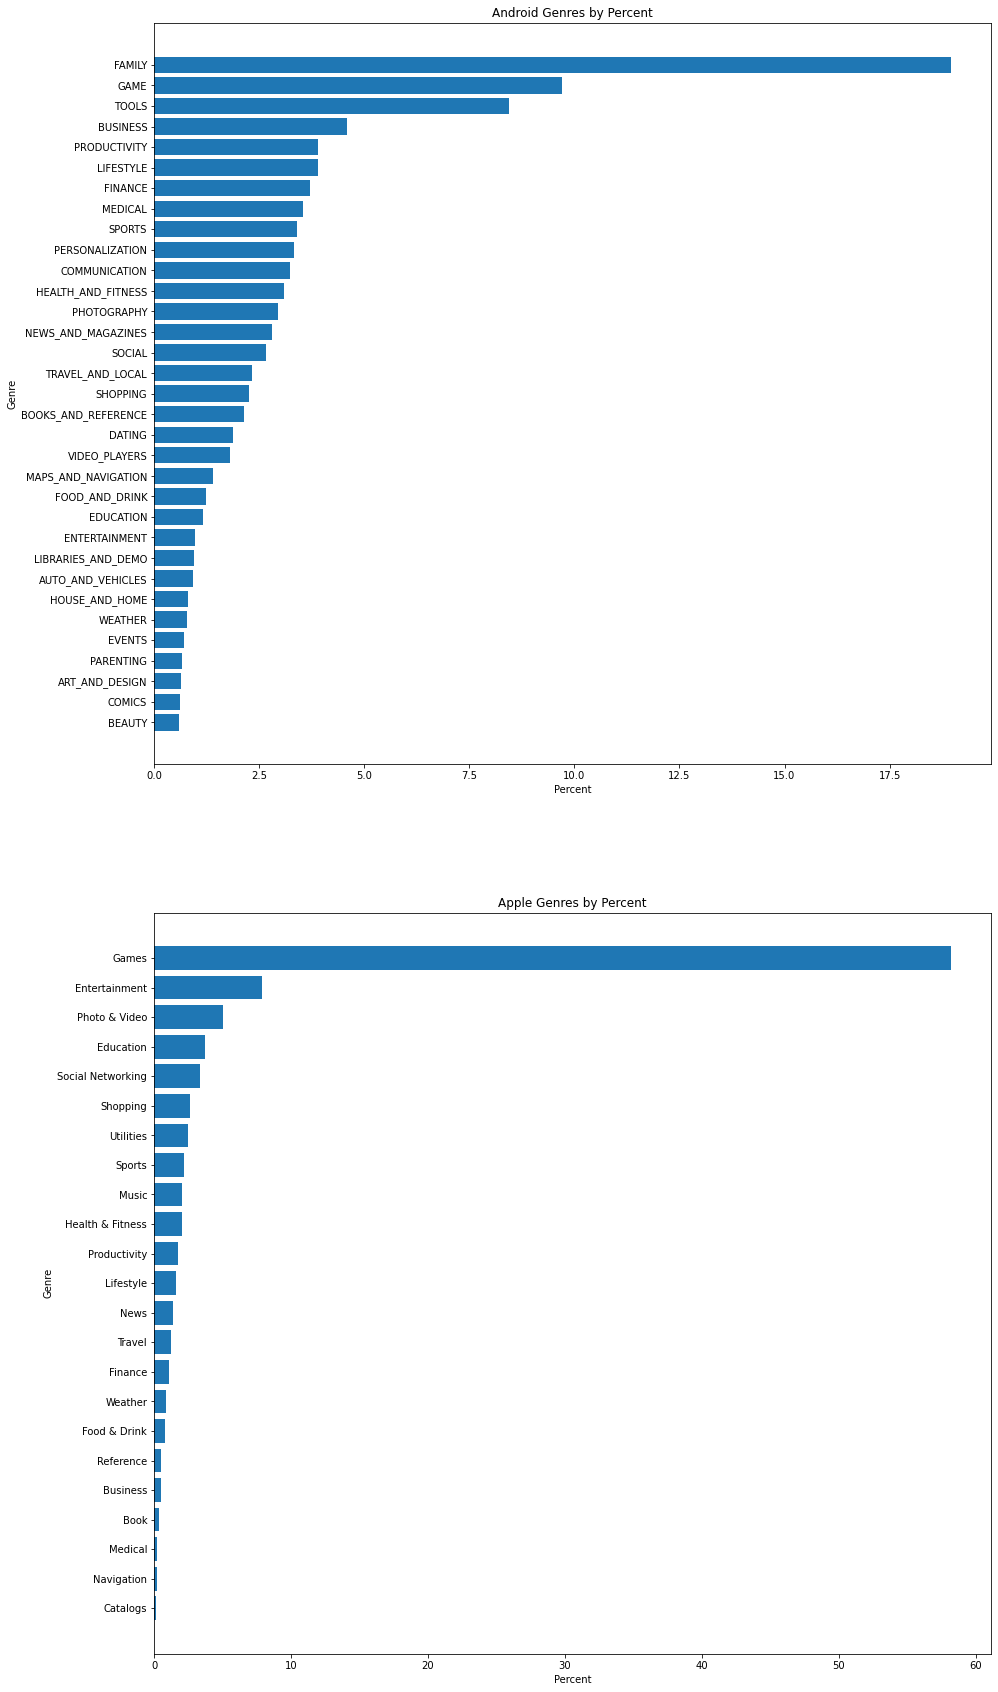

In [34]:
import matplotlib.pyplot as plt

apple_genre_count['Percent'] = apple_genre_count.values * 100 / sum(apple_genre_count.values)
apple_genre_count = apple_genre_count.sort_values(['Percent'], ascending = True)

android_genre_count['Percent'] = android_genre_count.values * 100 / sum(android_genre_count.values)
android_genre_count = android_genre_count.sort_values(['Percent'], ascending = True)

fig, axs = plt.subplots(2, figsize = (15, 30))
axs[0].set_title('Android Genres by Percent')
axs[0].barh(android_genre_count.index, android_genre_count['Percent'])
axs[0].set_xlabel('Percent')
axs[0].set_ylabel('Genre')
axs[1].set_title('Apple Genres by Percent')
axs[1].barh(apple_genre_count.index, apple_genre_count['Percent'])
axs[1].set_xlabel('Percent')
axs[1].set_ylabel('Genre')
plt.show()

The free apps in the App Store are dominated by Games and Entertainment accounting for around 70% of the apps. The top genres of free apps in the Google Play store are Family, Games, and Tools, and seems to be leaning toward more practical apps. However, if we take a look at the Google Play store, the Family category is really just games for kids. But even taking that into account, games and entertainment only account for about 30% of the free apps in the Google Play store.

### Most Popular Apps by Genre - App Store

To identify popularity of free apps by genre, we will need to find the mean number of users based on genre. Taking a look in our columns of the respective datasets, we do not have the specific numbers for the number of users each app has. In the App Store dataset, we will have to the the 'rating_count_tot', which is the total number of ratings given by users, as an indicator of the number of user downloands.

In [35]:
apple_genre_users_mean = app_store_data[['rating_count_tot', 'prime_genre']].groupby('prime_genre').mean()
apple_genre_users_mean = apple_genre_users_mean.sort_values('rating_count_tot', ascending = False)
apple_genre_users_mean

,rating_count_tot
prime_genre,
Navigation,86090.333333
Reference,79350.470588
Social Networking,71548.349057
Music,57326.530303
Weather,52279.892857
Book,46384.916667
Food & Drink,33333.923077
Finance,32367.028571
Photo & Video,28441.543750


Using the average by genre, we see that Navigation, Reference, and Social Networking have the highest average number of users for free apps. Let's take a look at the number of users in the apps for these genres.

In [36]:
for top_user_genre in apple_genre_users_mean.head(3).index:
    genre = app_store_data[app_store_data['prime_genre'] == top_user_genre]
    genre['Percentage of Users'] = genre['rating_count_tot'] * 100 / np.sum(genre['rating_count_tot'])
    print(top_user_genre + ': (' + str(genre.shape[0]) + ' apps)\n')
    print(genre[['track_name', 'rating_count_tot', 'Percentage of Users']].head(5))
    print('\n')

Navigation: (6 apps)

                                            track_name  rating_count_tot  \
49     Waze - GPS Navigation, Maps & Real-time Traffic            345046   
130                 Google Maps - Navigation & Transit            154911   
881                                        Geocaching®             12811   
1633       CoPilot GPS – Car Navigation & Offline Maps              3582   
3987  ImmobilienScout24: Real Estate Search in Germany               187   

      Percentage of Users  
49              66.799215  
130             29.990010  
881              2.480147  
1633             0.693458  
3987             0.036202  


Reference: (17 apps)

                                            track_name  rating_count_tot  \
6                                                Bible            985920   
90               Dictionary.com Dictionary & Thesaurus            200047   
335     Dictionary.com Dictionary & Thesaurus for iPad             54175   
551                      

<ipython-input-36-e0309f18b3f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre['Percentage of Users'] = genre['rating_count_tot'] * 100 / np.sum(genre['rating_count_tot'])
<ipython-input-36-e0309f18b3f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre['Percentage of Users'] = genre['rating_count_tot'] * 100 / np.sum(genre['rating_count_tot'])
<ipython-input-36-e0309f18b3f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Although Navigation, Reference, and Social Networking are the top 3 genres by average number of users, the values are clearly skewed and the average user is captured by a few popular apps. We may want to investigate the median number of users by genre.

As for the Google Play dataset, we have the 'Installs' column. However, the data in this column is bucketed based on the number of downloads.

In [37]:
apple_genre_users_median = app_store_data[['rating_count_tot', 'prime_genre']].groupby('prime_genre').median()
apple_genre_users_median = apple_genre_users_median.sort_values('rating_count_tot', ascending = False)
apple_genre_users_median

,rating_count_tot
prime_genre,
Productivity,8737.5
Reference,8535.0
Navigation,8196.5
Shopping,6408.0
Social Networking,4199.0
Music,3850.0
Health & Fitness,2459.0
Finance,2207.0
Photo & Video,2206.0


Based on the results, the most popular free apps in the App Store are in the 'Productivity' genre.

### Most Popular Apps by Genre - Google Play

For the Google Play dataset, we have an 'Installs' column which gives us the number of user downloads, but the data is bucketed. This is not an issue for our purposes because we are looking for the most popular. Let's first change our data to a numerical value.

In [38]:
android_installs = google_play_data['Installs'].apply(lambda x: int(x.replace('+', '').replace(',', '')))
android_installs_genre = pd.concat([android_installs, google_play_data['App'], google_play_data['Category']], axis = 1)

In [39]:
android_genre_users_mean = android_installs_genre[['Category', 'Installs']].groupby('Category').mean()
android_genre_users_mean = android_genre_users_mean.sort_values('Installs', ascending = False)
android_genre_users_mean

,Installs
Category,
COMMUNICATION,3.859058e+07
VIDEO_PLAYERS,2.472787e+07
SOCIAL,2.325365e+07
PHOTOGRAPHY,1.784011e+07
PRODUCTIVITY,1.678733e+07
GAME,1.554401e+07
TRAVEL_AND_LOCAL,1.398408e+07
ENTERTAINMENT,1.164071e+07
TOOLS,1.082914e+07


Communication is the genre of free apps with the highest average number of users in the Google Play store, followed by Video Players and Social. Similar to what we found in the App Store data, we expect skewed number of users but we will check to be sure.

In [40]:
for top_user_genre in android_genre_users_mean.head(3).index:
    genre = android_installs_genre[android_installs_genre['Category'] == top_user_genre]
    genre['Percentage of Users'] = genre['Installs'] * 100 / np.sum(genre['Installs'])
    print(top_user_genre + ': (' + str(genre.shape[0]) + ' apps)\n')
    print(genre[['App', 'Installs', 'Percentage of Users']].sort_values('Percentage of Users', ascending = False).head(5))
    print('\n')

COMMUNICATION: (286 apps)

                                          App    Installs  Percentage of Users
336                        WhatsApp Messenger  1000000000              9.06051
382  Messenger – Text and Video Chat for Free  1000000000              9.06051
464                                  Hangouts  1000000000              9.06051
411              Google Chrome: Fast & Secure  1000000000              9.06051
391             Skype - free IM & video calls  1000000000              9.06051


VIDEO_PLAYERS: (159 apps)

                                         App    Installs  Percentage of Users
3665                                 YouTube  1000000000            25.434085
3687                 Google Play Movies & TV  1000000000            25.434085
3711                               MX Player   500000000            12.717043
3675                         VLC for Android   100000000             2.543409
4688  VivaVideo - Video Editor & Photo Movie   100000000             2.543409




<ipython-input-40-4bfaa629575e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre['Percentage of Users'] = genre['Installs'] * 100 / np.sum(genre['Installs'])
<ipython-input-40-4bfaa629575e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre['Percentage of Users'] = genre['Installs'] * 100 / np.sum(genre['Installs'])
<ipython-input-40-4bfaa629575e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



As expected, the majority of the users in each genre are captured by just a couple apps. We will once again use the median to identify the most popular free apps in the Google Play store by genre.

In [41]:
android_genre_users_median = android_installs_genre[['Category', 'Installs']].groupby('Category').median()
android_genre_users_median = android_genre_users_median.sort_values('Installs', ascending = False)
android_genre_users_median

,Installs
Category,
WEATHER,1000000
ENTERTAINMENT,1000000
VIDEO_PLAYERS,1000000
SHOPPING,1000000
PHOTOGRAPHY,1000000
GAME,1000000
EDUCATION,1000000
HEALTH_AND_FITNESS,500000
FOOD_AND_DRINK,500000


For the free apps in the Google Play store, the most popular genres are Weather, Entertainment, Video Players, Shopping, Photograph, Game, and Education.